In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Open File
file = "0_Used_Cars_Datasat.csv"
df = pd.read_csv(file)

In [5]:
#Drop Irrelevant columns
drop_irrelevant_cols = ['id','url','region_url', 'image_url', 'description','county','VIN','posting_date','lat','long' ]
df = df.drop(columns=drop_irrelevant_cols)

In [6]:
#Haead file
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


Drop Numerical Outliers

<Axes: xlabel='price'>

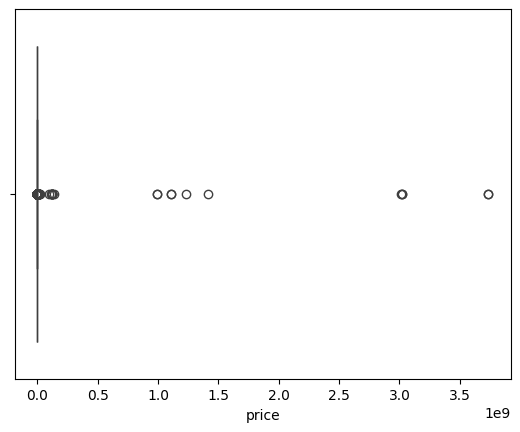

In [7]:
#Price
df['year'] = df['year'].astype('Int64')
sns.boxplot(x=df['price'])

In [8]:
#Delete Prices outside of the 1100-59999 range
df = df[df['price'].between(1100, 59999)]
df['price'].describe()

count    372979.000000
mean      18625.091064
std       12824.191606
min        1100.000000
25%        7950.000000
50%       15900.000000
75%       27500.000000
max       59999.000000
Name: price, dtype: float64

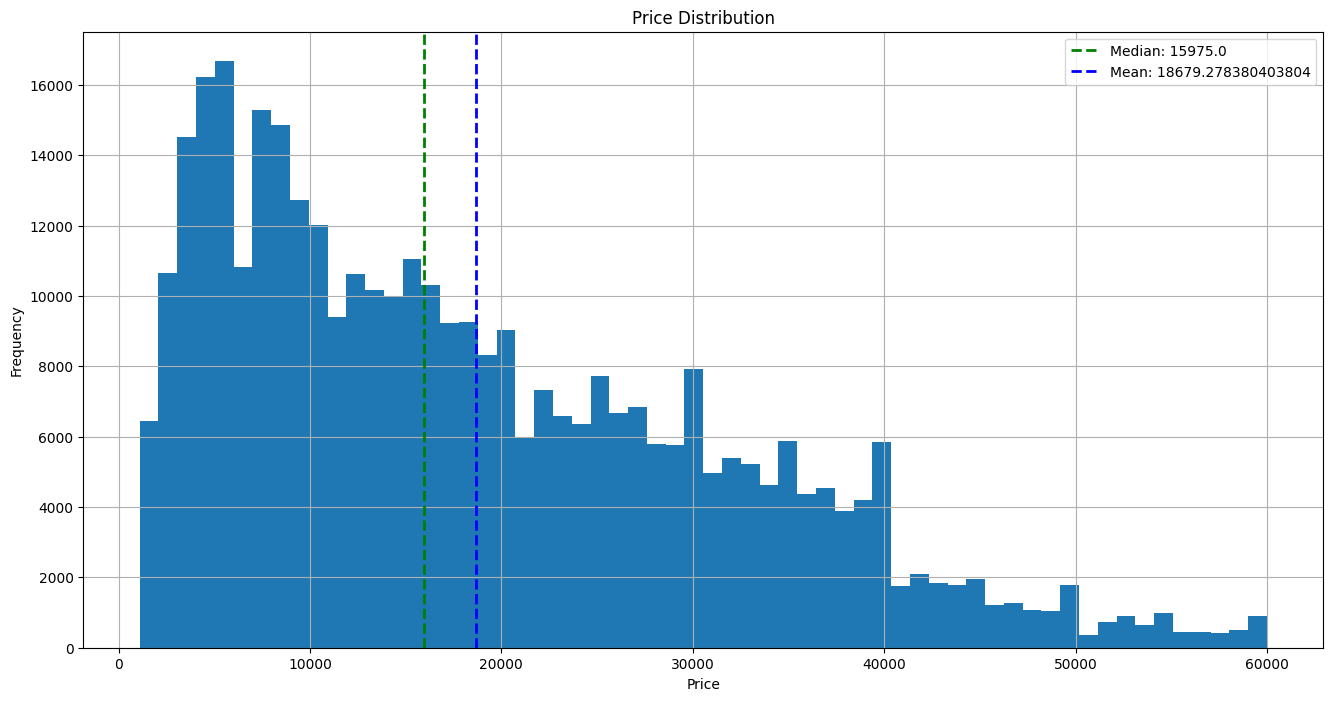

In [15]:
median_price = df['price'].median()
mean_price = df['price'].mean()

plt.figure(figsize=(16, 8))
plt.hist(df['price'],bins=60)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.axvline(median_price, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_price}')
plt.axvline(mean_price, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price}')
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='odometer'>

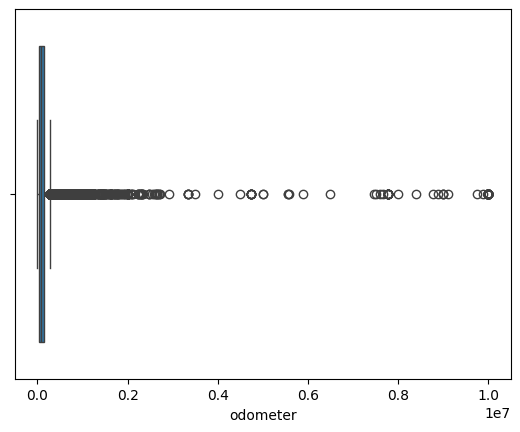

In [10]:
#Odometer
sns.boxplot(x=df['odometer'])

In [12]:
#Delete mileage outside of the 10-300000 range
df = df[df['odometer'].between(10, 300000)]

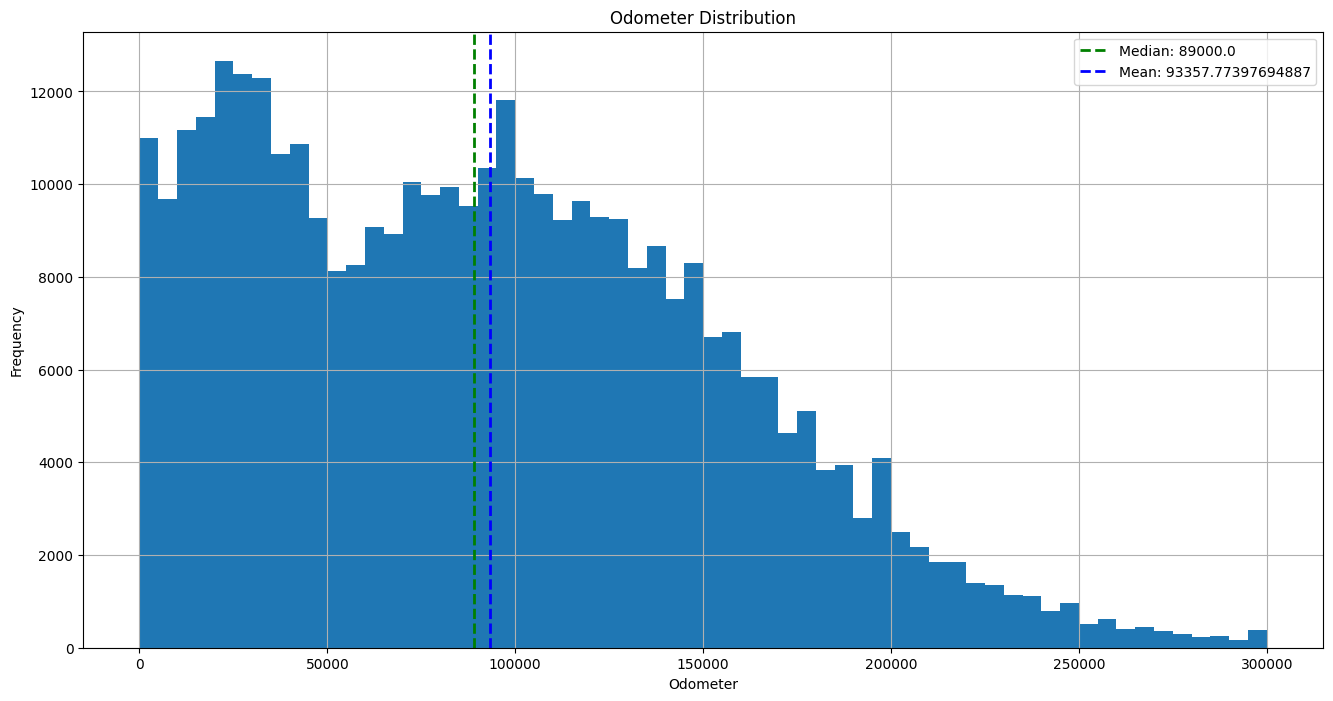

In [16]:
median_price = df['odometer'].median()
mean_price = df['odometer'].mean()
plt.figure(figsize=(16, 8))
plt.hist(df['odometer'],bins=60)
plt.title('Odometer Distribution')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.axvline(median_price, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_price}')
plt.axvline(mean_price, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price}')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#Year 
df['year'].describe()

count       364679.0
mean     2011.068213
std         9.252417
min           1900.0
25%           2008.0
50%           2013.0
75%           2017.0
max           2022.0
Name: year, dtype: Float64

In [18]:
#Delete years outside of the 1980-2021 range
df = df[df['year'].between(1980, 2021)]

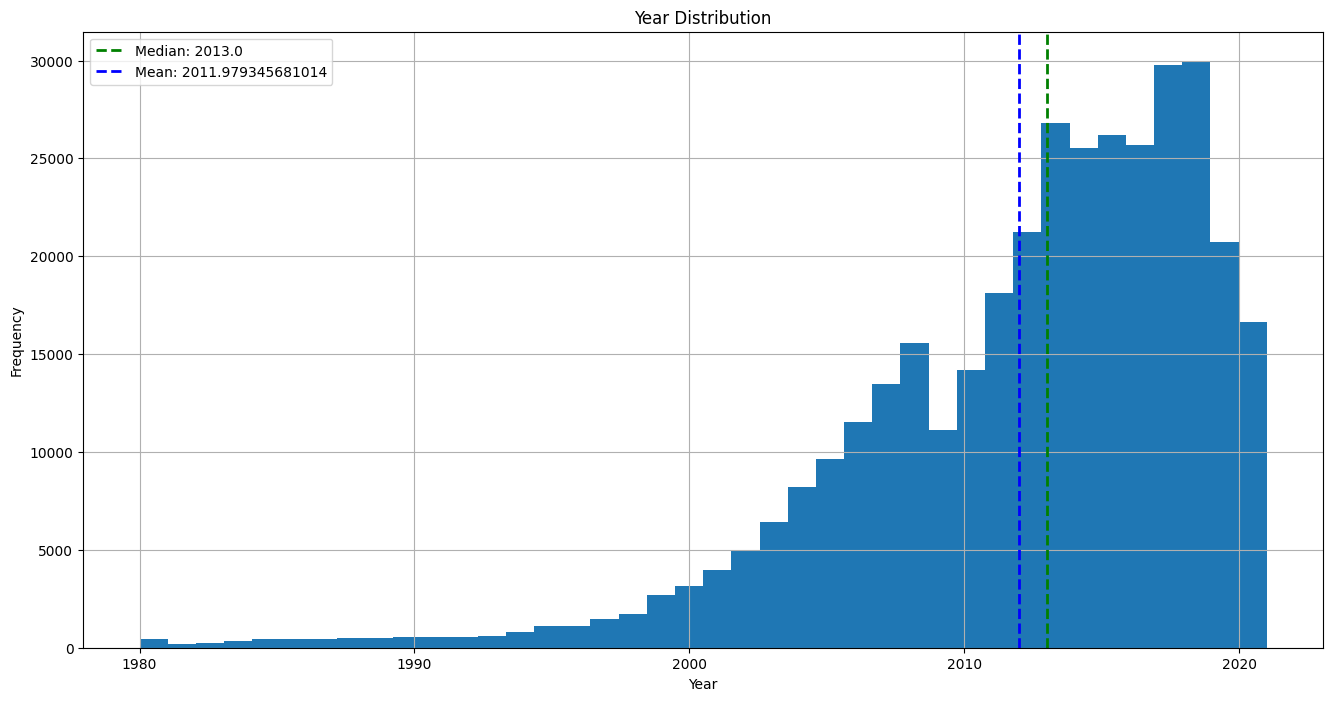

In [19]:
median_price = df['year'].median()
mean_price = df['year'].mean()
plt.figure(figsize=(16, 8))
plt.hist(df['year'],bins=40)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.axvline(median_price, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_price}')
plt.axvline(mean_price, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price}')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
df['year'].describe()

count       357746.0
mean     2011.979346
std         6.324019
min           1980.0
25%           2008.0
50%           2013.0
75%           2017.0
max           2021.0
Name: year, dtype: Float64

In [22]:
#Percentage of Missing Data
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
size,256907,71.813
cylinders,145746,40.740
condition,132720,37.099
drive,107421,30.027
paint_color,100393,28.063
type,73636,20.583
manufacturer,10848,3.032
title_status,5688,1.590
model,3240,0.906
fuel,2046,0.572


Cleaning The Model Variable

In [23]:
#Unique amount of models more than 200 times in the data 
count_types_more_than_one = df['model'].value_counts()[df['model'].value_counts() > 200].count()
print(count_types_more_than_one)

279


In [24]:
#value count
model_counts = df['model'].value_counts()

#Subset data more than 10 values
df_filtered = df[df['model'].isin(model_counts[model_counts > 10].index)]
print(f'Amount after deletion rows: {df_filtered.shape[0]}')
print(f'Deleted rows: {df.shape[0] - df_filtered.shape[0]}')

Amount after deletion rows: 309854
Deleted rows: 47892


In [282]:
#Mapping Lists to clean models
model_freq = (
    df.groupby(['model', 'manufacturer'])
    .size()
    .reset_index(name='count'))

#Download more than 10 times in the data
models_10 = model_freq[model_freq['count'] >= 10]
models_10.to_csv('model_freq_over_10.csv', index=False)

#Download more than 200 times in the data
models_200 = model_freq[model_freq['count'] >= 200]
models_200.to_csv('model_freq_over_200.csv', index=False)


Andere document samenvoegen (Voor nu komt hier dus "Model Cleaned > 10.csv" uit)

In [25]:
#Lowering Model Feature
df['model'] = df['model'].str.lower()
df['manufacturer'] = df['manufacturer'].str.lower()

In [27]:
#Adding Cleaned document for every model with more than 10 times the same value 
model_clean_df = pd.read_csv("Model Cleaned > 10.csv",delimiter=";")
df_merged = df.merge(model_clean_df, on=['model','manufacturer'], how='left')

In [28]:
#Drop unclear models + Drop all features to clean models + Turn model_clean2 -> model
df = df_merged.dropna(subset=['model_clean2'])
df = df.drop(columns=['model_first3','model_first','model','count'])
df['model'] = df['model_clean2']
df = df.drop(columns=['model_clean2'])

In [29]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
size,221981,72.450
cylinders,127619,41.652
condition,115668,37.752
drive,92552,30.207
paint_color,84627,27.620
type,61807,20.173
title_status,3161,1.032
transmission,1291,0.421
fuel,664,0.217
region,0,0.000


Missing Data Imputation

In [34]:
#Drop size
df.drop("size", axis=1, inplace=True)

In [35]:
#Drop NA values Fuel
df = df[df['fuel'].notna()]

In [30]:
df = df[df['transmission'].notna()]

In [31]:
#Title status

#Combining Categories
df['title_status'] =df['title_status'].replace({
    'rebuilt': 'damaged',
    'salvage': 'damaged',
    'lien': 'other',
    'missing': 'other',
    'parts only':'damaged'
})

#Fill NA Values with other
df['title_status'] = df['title_status'].fillna('other')

In [39]:
#Paint Color
df['paint_color'] = df['paint_color'].fillna('unknown')

#Reclassifying all colors into three groups (Unkown, Neutral, Colorful)
def group_color(color):
    if color in ['unknown']:
        return 'unkown'
    elif color in ['white', 'black', 'silver','grey','brown']:
        return 'neutral'
    elif color in ['blue', 'red', 'custom','green','orange','yellow','purple']:
        return 'colorful'
    else:
        return 'unkown'

df['grouped_color'] = df['paint_color'].apply(group_color)

In [41]:
#Drive
#Mapping List for NA Drive values based on manufacturer, model and year 
drive_lookup = (
    df[~df['drive'].isnull()]
    .groupby(['manufacturer', 'model','year'])['drive']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .to_dict()
)

def fill_drive_from_model_year(row):
    if pd.isna(row['drive']):
        return drive_lookup.get((row['manufacturer'], row['model']), np.nan)
    else:
        return row['drive']
    
df['drive'] = df.apply(fill_drive_from_model_year, axis=1)

#If not filled in Mapping List for NA Drive values based on manufacturer and model 
drive_lookup = (
    df[~df['drive'].isnull()]
    .groupby(['manufacturer', 'model'])['drive']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .to_dict()
)

def fill_drive_from_model_year(row):
    if pd.isna(row['drive']):
        return drive_lookup.get((row['manufacturer'], row['model']), np.nan)
    else:
        return row['drive']
    
df['drive'] = df.apply(fill_drive_from_model_year, axis=1)

#Drop all NA values left (791)
df = df.dropna(subset=['drive'])

NA Toevoegen Manufacturers op basis van zelfde modellen.  

In [45]:
#Manufacturer

#Combine Land rover and rover
df.loc[:, 'manufacturer'] = df['manufacturer'].replace({'rover': 'land rover'})

In [47]:
#Type

#Combine truck and pickup
df.loc[:, 'type'] = df['type'].replace({'truck': 'pickup'})
df = df.copy()

#Mapping List for NA Type values based on model max values models
model_to_type = df[df['type'].notna() & df['model'].notna()]\
    .groupby('model')['type']\
    .agg(lambda x: x.value_counts().idxmax())\
    .to_dict()



In [48]:
#Mapping List for NA type values based on model 

model_to_type = df[df['type'].notna() & df['model'].notna()]\
    .groupby('model')['type']\
    .agg(lambda x: x.value_counts().idxmax())\
    .to_dict()

def fill_type(row):
    if pd.isna(row['type']) and row['model'] in model_to_type:
        return model_to_type[row['model']]
    else:
        return row['type']

df['type'] = df.apply(fill_type, axis=1)

In [50]:
#Group Type into 4 categories
def group_type(type_value):
    if type_value in ['sedan', 'hatchback','wagon','coupe','convertible']:
        return 'compact'
    elif type_value in ['SUV', 'van', 'mini-van']:
        return 'big'
    elif type_value in ['pickup', 'bus', 'offroad']:
        return 'work'
    else:
        return 'other'

df['type_grouped'] = df['type'].apply(group_type)

In [51]:
#Conditions

#Group Conditions into 4 categories
def group_condition(cond):
    if pd.isna(cond):
        return np.nan  
    elif cond in ['new', 'excellent']:
        return 'excellent'
    elif cond in ['good', 'like new']:
        return 'good'
    else:
        return cond 

df['condition_grouped'] = df['condition'].apply(group_condition)

In [53]:
#Mapping List for NA Conditions Grouped values based on manufacturer and year 
condition_lookup = (
    df[~df['condition_grouped'].isnull()]
    .groupby(['manufacturer', 'year'])['condition_grouped']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .to_dict())
def fill_condition_from_model_year(row):
    if pd.isna(row['condition_grouped']):
        return condition_lookup.get((row['manufacturer'], row['year']), np.nan)
    else:
        return row['condition_grouped']
    
df['condition_grouped'] = df.apply(fill_condition_from_model_year, axis=1)
df = df[df['condition_grouped'].notna()]
df['condition'] = df['condition'].fillna('unknown')

In [60]:
#Cylinders 

#Clean Cylinder values
def extract_cylinders(val):
    if pd.isna(val) or val == 'other':
        return np.nan
    try:
        return int(val.split()[0])
    except:
        return np.nan
    
df["cylinders_clean"] = df['cylinders'].apply(extract_cylinders)

#Categorize Cylinders
def categorize_cylinders(n):
    if pd.isna(n):
        return np.nan
    elif n <= 4:
        return 'low' 
    elif n <= 6:
        return 'mid' 
    else:
        return 'high'

df['cylinders_cat'] = df['cylinders_clean'].apply(categorize_cylinders)

#Mapping List for NA Cylinders Cat values based on Model and Type 
cyl_cat_lookup = (
    df[~df['cylinders_cat'].isnull()]  
    .groupby(['model', 'type'])['cylinders_cat']  
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)  
    .to_dict()
)
#Fill in Cylinder categories
def fill_cyl_cat(row):
    if pd.isna(row['cylinders_cat']):
        return cyl_cat_lookup.get((row['model'], row['type']), np.nan)
    else:
        return row['cylinders_cat']

df['cylinders_cat'] = df.apply(fill_cyl_cat, axis=1)
df = df[df['cylinders_cat'].notna()]
df.drop(columns=['cylinders','cylinders_clean'], inplace=True)

In [65]:
#Check NA Values after imputation
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
region,0,0.0
price,0,0.0
condition_grouped,0,0.0
type_grouped,0,0.0
grouped_color,0,0.0
model,0,0.0
state,0,0.0
paint_color,0,0.0
type,0,0.0
drive,0,0.0


In [68]:
#Create Car Age Variable
df['car_age'] = 2022 - df['year']
df['car_age'] = df['car_age'].astype(float)


In [69]:
#Create Mileage per Year
df['miles_age'] = (df['odometer'] / df['car_age']).round(2)

In [70]:
df.head()

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,type,paint_color,state,model,grouped_color,type_grouped,condition_grouped,cylinders_cat,car_age,miles_age
0,auburn,33590,2014,gmc,good,gas,57923.0,clean,other,4wd,pickup,white,al,sierra 1500,neutral,work,good,high,8.0,7240.38
1,auburn,22590,2010,chevrolet,good,gas,71229.0,clean,other,4wd,pickup,blue,al,silverado 1500,colorful,work,good,high,12.0,5935.75
2,auburn,39590,2020,chevrolet,good,gas,19160.0,clean,other,4wd,pickup,red,al,silverado 1500,colorful,work,good,high,2.0,9580.00
3,auburn,30990,2017,toyota,good,gas,41124.0,clean,other,4wd,pickup,red,al,tundra,colorful,work,good,high,5.0,8224.80
4,auburn,15000,2013,ford,excellent,gas,128000.0,clean,automatic,rwd,pickup,black,al,f150,neutral,work,excellent,mid,9.0,14222.22


<Axes: xlabel='miles_age'>

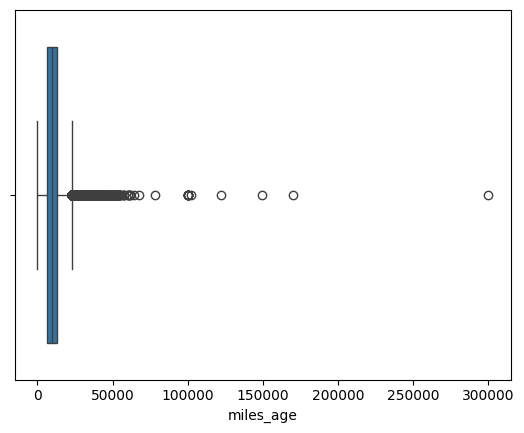

In [73]:
sns.boxplot(x=df['miles_age'])

In [75]:
#Delete outliers Miles age
df = df[df["miles_age"] < 78000]

In [82]:
#Create Segments
high = df[df['price'] > 30000].shape[0]
mid = df[(df['price'] > 16000) & (df['price'] <= 30000)].shape[0]
low = df[df['price'] <= 16000].shape[0]

print(f"Value Count Segements, Low: {low}, Mid: {mid}, High: {high}")
df=df.copy()

#Create Segments based on Price and Distributions
def assign_price_segment(row):
    if row['price'] <= 16000:
        return 'low'
    elif row['price'] <= 30000:
        return 'mid'
    else:
        return 'high'

df['price_segment'] = df.apply(assign_price_segment, axis=1)

Value Count Segements, Low: 153049, Mid: 88644, High: 58166


In [83]:
#Delete Duplicate values
df = df.drop_duplicates(keep='first').copy()

In [85]:
#Check Duplicates
dup = df.duplicated(keep=False).sum()
print(f"Duplicates: {dup}")

Duplicates: 0


In [86]:
#Check Segment Amounts
df['price_segment'].value_counts()
#Low: 50.27%
#Mid: 29.89%
#High: 19.84%

price_segment
low     131640
mid      78267
high     51933
Name: count, dtype: int64

In [88]:
#Save Document
df.to_csv("01_Used_Cars_Cleaned.csv", index=False)